# Power production project
###### Fundamentals of data analysis
###### Jonathan Harper
###### [1] How wind turbines work ; https://www.energy.gov/maps/how-does-wind-turbine-work
###### [2] Inside a wind turbine ; https://www.energy.gov/eere/wind/inside-wind-turbine
###### [3] How to insert an image into a Jupyter notebook ; https://findanyanswer.com/how-do-i-add-an-image-to-a-jupyter-notebook

##### Aim:- To examine the relationship between wind speed and power output with respect to a wind turbine.

##### Background:- It's worth understanding a little about the engineering that sits behind the task.
> Wind energy contains kinetic energy, the principle behind a wind turbine is that the kinetic energy performs work via a system of shafts and gears (low to high). This work spins a generator to induce an electrical currant.

> Note the turbine also has an anonometer that provides windspeed information to the controller, this feature ensure that the turbines stop operation during periods on high winds that might damage the equipment. The turbine also has control features for pitch (position blades to the wind), brake (for emergency stops),wind vane (for positioning the turbine to the wind)

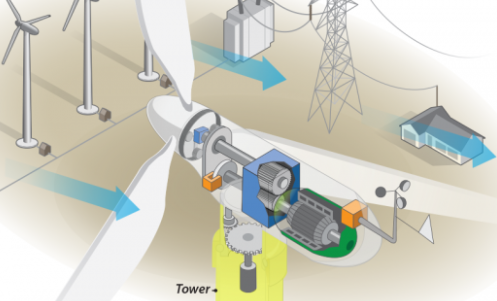

<em>image 1 basic cut through of a wind turbine<em/>
    
> For the purposes of our analysis we will not focus on the mechanical performance of the turbine (although this could affect our data) and focus solely on the relationship between observed windspeed and power output.

##### Getting started
> Firstly I will ensure that the data is imported and check this by producing visual output of the data.

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
print (df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [3]:
print (df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


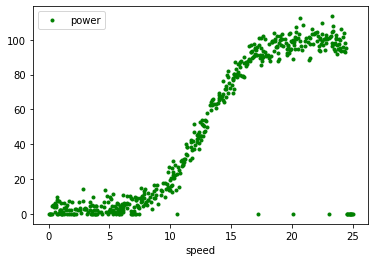

In [4]:
import matplotlib.pyplot as plt
x = 'speed'
y = 'power'
df.plot(x,y,color='green',linestyle ='none', marker='.')
plt.show()


###### The basic analysis shows us that the data set appears to be correctly imported and the output is generally as we expected in that as wind speed increases the power output increases. It should be noted though that at wind speeds upto approximately 8m/s the power output can be zero and close to zero with little (visual correlation between values). 

###### From 8m/s on the power output follows a relationship closer to the basic relationship we might anticipate through to approximately 18m/s. As wind speed increases the power output measured increases.

###### From approximately 18m/s onwards the relationship between power output and speed changes again with little extra return in power for increased speed. Indeed at the highest speeds the power output is zero leading to the conclusion that the turbine was not operational at the very highest wind speed.

###### However it is also noted that there are a number of data points in which the power output is zero when we would expect there to be a non zero output. These points would also indicate that the turbine was none operational or power output was interupted.

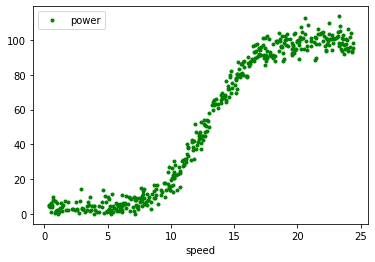

In [5]:
df = df.loc[df.loc[:,'power']>0]
x = 'speed'
y = 'power'
df.plot(x,y,color='green',linestyle ='none', marker='.')
plt.show()

In [6]:
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [52]:
df.loc[:,"power"]

5        4.331
6        5.186
7        3.826
8        1.048
9        5.553
        ...   
485    103.700
486     93.694
487     93.078
488     98.223
489     95.117
Name: power, Length: 451, dtype: float64

In [8]:
(df.describe())

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [34]:
print(x[])

e


###### We can see that the data clean up has removed 49 rows of data in which the power output was 0

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

a = df.loc[:,"speed"]
b = df.loc[:,"power"]
x = np.array(a).reshape(-1,1)
y = np.array(b).reshape(-1,1)
print(x)
print(y)
 

# Use only one feature
x = x [:,np.newaxis,0]


# Split the data into training/testing sets
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


# Split the targets into training/testing sets


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test, df_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df_y_test, df_y_pred))

# Plot outputs
plt.scatter(df_X_test, df_y_test,  color='black')
plt.plot(df_X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

[[ 0.325]
 [ 0.4  ]
 [ 0.45 ]
 [ 0.501]
 [ 0.526]
 [ 0.551]
 [ 0.576]
 [ 0.626]
 [ 0.676]
 [ 0.701]
 [ 0.801]
 [ 0.826]
 [ 0.851]
 [ 0.926]
 [ 0.951]
 [ 0.976]
 [ 1.001]
 [ 1.051]
 [ 1.101]
 [ 1.151]
 [ 1.251]
 [ 1.276]
 [ 1.401]
 [ 1.426]
 [ 1.502]
 [ 1.652]
 [ 1.702]
 [ 1.877]
 [ 1.902]
 [ 2.177]
 [ 2.227]
 [ 2.402]
 [ 2.477]
 [ 2.553]
 [ 2.578]
 [ 2.703]
 [ 2.828]
 [ 2.853]
 [ 2.953]
 [ 3.003]
 [ 3.028]
 [ 3.053]
 [ 3.078]
 [ 3.203]
 [ 3.378]
 [ 3.403]
 [ 3.428]
 [ 3.529]
 [ 3.604]
 [ 3.629]
 [ 3.704]
 [ 3.729]
 [ 3.904]
 [ 3.929]
 [ 3.954]
 [ 3.979]
 [ 4.179]
 [ 4.304]
 [ 4.329]
 [ 4.53 ]
 [ 4.555]
 [ 4.605]
 [ 4.73 ]
 [ 4.78 ]
 [ 4.905]
 [ 4.93 ]
 [ 4.955]
 [ 4.98 ]
 [ 5.03 ]
 [ 5.08 ]
 [ 5.13 ]
 [ 5.18 ]
 [ 5.205]
 [ 5.255]
 [ 5.28 ]
 [ 5.305]
 [ 5.43 ]
 [ 5.455]
 [ 5.506]
 [ 5.631]
 [ 5.681]
 [ 5.706]
 [ 5.731]
 [ 5.831]
 [ 5.906]
 [ 5.956]
 [ 5.981]
 [ 6.006]
 [ 6.031]
 [ 6.081]
 [ 6.106]
 [ 6.131]
 [ 6.156]
 [ 6.181]
 [ 6.231]
 [ 6.356]
 [ 6.406]
 [ 6.456]
 [ 6.481]
 [ 6.607]


NameError: name 'X' is not defined

In [52]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import linear_model
from sklearn.metrics import r2_score

lr = linear_model.LinearRegression()
X = x.values.reshape(-1,1)
sklearn_model = lr.fit(X,y)
plt.show()

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

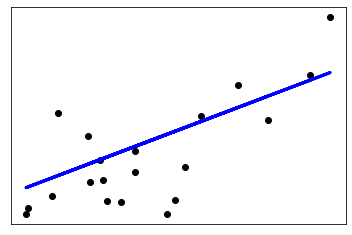

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X)
print(diabetes_y)
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()